In [1]:
import os
import json
import uuid
from typing import List, Tuple, Literal, Annotated

from dotenv import load_dotenv
from langchain.chains.summarize.map_reduce_prompt import prompt_template
from langchain_openai import AzureChatOpenAI
from langchain_core.messages import SystemMessage, AIMessage, HumanMessage, ToolMessage
# from langchain_core.pydantic_v1 import BaseModel
from pydantic import BaseModel
# from langgraph.graph import StateGraph, END, START
# from langgraph.checkpoint.memory import MemorySaver
# from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
# import gradio as gr

from gen_ai_hub.proxy.langchain.openai import ChatOpenAI
from gen_ai_hub.proxy.core.proxy_clients import get_proxy_client

proxy_client = get_proxy_client("gen-ai-hub")



load_dotenv()

True

In [2]:
aicore_home = os.getenv("AICORE_HOME")
profile = os.getenv("AICORE_PROFILE", "default")
config_path = os.path.join(aicore_home, f"config.json")
from ai_core_sdk.ai_core_v2_client import AICoreV2Client

# 구성 파일에서 값 읽어오기
with open(config_path, "r") as config_file:
    config = json.load(config_file)

# 클라이언트 초기화
ai_core_client = AICoreV2Client(
    base_url=config["AICORE_BASE_URL"],
    auth_url=config["AICORE_AUTH_URL"],
    client_id=config["AICORE_CLIENT_ID"],
    client_secret=config["AICORE_CLIENT_SECRET"],
)

print("AI Core client initialized successfully!")

AI Core client initialized successfully!


In [3]:
llm = ChatOpenAI(proxy_model_name='gpt-4o-mini', proxy_client=proxy_client)
model = ChatOpenAI(proxy_model_name='gpt-4o-mini', proxy_client=proxy_client)

In [5]:
from langchain_core.prompts import ChatPromptTemplate


from langchain_openai import ChatOpenAI

# Assume OPENAI_API_KEY is set
prompt = ChatPromptTemplate.from_template("Tell me a joke about {topic}")
model = ChatOpenAI()

# This creates a RunnableSequence instance
chain = prompt | model

In [7]:
response = chain.invoke({"topic": "cats"})
print(response.content)

Why was the cat sitting on the computer?

Because it wanted to keep an eye on the mouse!


In [ ]:
from langchain_core.runnables import RunnableParallel

# Example setup (replace with actual runnables)
runnable1 = ChatPromptTemplate.from_template("Runnable 1: {input}") | model
runnable2 = ChatPromptTemplate.from_template("Runnable 2: {input}") | model

# Define parallel execution using a dictionary
parallel_chain = RunnableParallel(
    steps={
        "output1": runnable1,
        "output2": runnable2,
    }
)

# Or equivalently:
# parallel_chain = {"output1": runnable1, "output2": runnable2}

# Invoking this runs runnable1 and runnable2 potentially in parallel
# The input is passed to *both* runnables
output = parallel_chain.invoke({"input": "parallel processing"})

# Output will be a dictionary:
# {'output1': AIMessage(...), 'output2': AIMessage(...)}

In [22]:
pprint(output)

{'steps': {'output1': AIMessage(content='Parallel processing is a method of executing multiple tasks simultaneously, speeding up data processing and computation. This can be achieved by splitting a large task into smaller sub-tasks and executing them in parallel on multiple processors or cores. \n\nIn this runnable example, I will demonstrate parallel processing using the Java programming language. We will create a simple program that calculates the square of numbers in parallel.\n\n```java\nimport java.util.concurrent.ExecutorService;\nimport java.util.concurrent.Executors;\n\npublic class ParallelProcessingExample {\n\n    public static void main(String[] args) {\n        int[] numbers = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10};\n\n        ExecutorService executor = Executors.newFixedThreadPool(5);\n\n        for (int number : numbers) {\n            executor.submit(() -> {\n                int square = number * number;\n                System.out.println("Square of " + number + " is: " + squ

In [23]:
pprint(output["steps"]["output1"].content)

('Parallel processing is a method of executing multiple tasks simultaneously, '
 'speeding up data processing and computation. This can be achieved by '
 'splitting a large task into smaller sub-tasks and executing them in parallel '
 'on multiple processors or cores. \n'
 '\n'
 'In this runnable example, I will demonstrate parallel processing using the '
 'Java programming language. We will create a simple program that calculates '
 'the square of numbers in parallel.\n'
 '\n'
 '```java\n'
 'import java.util.concurrent.ExecutorService;\n'
 'import java.util.concurrent.Executors;\n'
 '\n'
 'public class ParallelProcessingExample {\n'
 '\n'
 '    public static void main(String[] args) {\n'
 '        int[] numbers = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10};\n'
 '\n'
 '        ExecutorService executor = Executors.newFixedThreadPool(5);\n'
 '\n'
 '        for (int number : numbers) {\n'
 '            executor.submit(() -> {\n'
 '                int square = number * number;\n'
 '                Sys

In [ ]:
# Example of passing configuration
result = chain.with_config({"run_name": "JokeGenerationRun"}).invoke(
    {"topic": "robots"}
)

In [26]:
from pprint import pprint

In [25]:
pprint(result)  # Should print "JokeGenerationRun"

AIMessage(content='Why did the robot go on a diet? Because it had too many bytes!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BrDO8648dDD9qoqqhoibzdVIoj7js', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c2a60af9-35cc-4027-a3f1-463e3e85aa0e-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})


In [27]:
# Synchronous Example
# Assume setup for prompt, model, parser is done
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

prompt = ChatPromptTemplate.from_template("Tell me a joke about {topic}")
model = ChatOpenAI()
output_parser = StrOutputParser()
sync_chain = prompt | model | output_parser

result = sync_chain.invoke({"topic": "programmers"})
print(result)

Why do programmers prefer dark mode? Because light attracts bugs!


In [ ]:
import asyncio

# Assume setup for prompt, model, parser is done (as above)
# sync_chain = prompt | model | output_parser # LCEL chains automatically support async if components do


async def run_async_chain():
    print("Running async chain...")
    # Use ainvoke instead of invoke
    result = await sync_chain.ainvoke({"topic": "data scientists"})
    print(result)
    # If model supports streaming:
    # print("Streaming response:")
    # async for chunk in sync_chain.astream({"topic": "async programming"}):
    #   print(chunk, end="", flush=True)
    # print()


async def main():
    await run_async_chain()


if __name__ == "__main__":
    # Start the asyncio event loop
    asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

# Assume 'llm' is an initialized ChatOpenAI instance
llm = ChatOpenAI()
# Step 1: Initial processing, maybe extract entities
prompt1 = ChatPromptTemplate.from_template("Extract names from: {input}")
chain1 = prompt1 | llm

# Step 2: Use extracted names (state) along with original input for next step
prompt2 = ChatPromptTemplate.from_template(
    "Generate a greeting for {name} based on this context: {original_input}"
)
chain2 = prompt2 | llm

# Combine, passing original input and adding 'name' to the state dict
# The input to this chain is expected to be a dictionary, e.g., {"input": "John Doe visited Paris."}
complex_chain = (
    RunnablePassthrough.assign(
        name=chain1,  # Runs chain1, adds result under 'name' key
        original_input=lambda x: x["input"],  # Passes 'input' key as 'original_input'
    )
    | chain2
)  # chain2 now receives {'name': 'John Doe', 'original_input': '...'}

# Example invocation:
result = complex_chain.invoke({"input": "Alice went to the store."})
print(result)

content='Hello, Alice! How was your trip to the store?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 277, 'total_tokens': 289, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BrE90HD5kmHWjWKhTIaCk9ZyRpGXd', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--c5e9f3bf-f6a1-4124-b49f-62908337d00d-0' usage_metadata={'input_tokens': 277, 'output_tokens': 12, 'total_tokens': 289, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [ ]:
from langchain_core.runnables import RunnableParallel

# Step 1a: Extract topic
prompt_topic = ChatPromptTemplate.from_template("What is the topic of: {input}?")
chain_topic = prompt_topic | llm

# Step 1b: Extract sentiment
prompt_sentiment = ChatPromptTemplate.from_template(
    "What is the sentiment of: {input}?"
)
chain_sentiment = prompt_sentiment | llm

# Step 2: Summarize using topic and sentiment
prompt_summary = ChatPromptTemplate.from_template(
    "Summarize this text: {original_input}\nFocusing on the topic: {topic}\nAdopt a {sentiment} tone."
)
chain_summary = prompt_summary | llm

# Combine using RunnableParallel to create a state dictionary
state_creation = RunnableParallel(
    topic=chain_topic,
    sentiment=chain_sentiment,
    original_input=RunnablePassthrough(),  # Pass the original input through
)

full_chain = state_creation | chain_summary

In [40]:
# Example invocation:
input_text = "The new product launch was a huge success, exceeding all expectations."
result = full_chain.invoke({"input": input_text})

pprint(result)

AIMessage(content='The text describes a successful product launch that exceeded expectations, with a positive sentiment.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 578, 'total_tokens': 594, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BrELsOoyMWgMENEEWUMtGop2tywAu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--fa33857f-def0-4b9b-8400-23d6e0071b61-0', usage_metadata={'input_tokens': 578, 'output_tokens': 16, 'total_tokens': 594, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})


In [41]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field


llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

In [42]:
email_conversation = """From: 김철수 (chulsoo.kim@bikecorporation.me)
To: 이은채 (eunchae@teddyinternational.me)
Subject: "ZENESIS" 자전거 유통 협력 및 미팅 일정 제안

안녕하세요, 이은채 대리님,

저는 바이크코퍼레이션의 김철수 상무입니다. 최근 보도자료를 통해 귀사의 신규 자전거 "ZENESIS"에 대해 알게 되었습니다. 바이크코퍼레이션은 자전거 제조 및 유통 분야에서 혁신과 품질을 선도하는 기업으로, 이 분야에서의 장기적인 경험과 전문성을 가지고 있습니다.

ZENESIS 모델에 대한 상세한 브로슈어를 요청드립니다. 특히 기술 사양, 배터리 성능, 그리고 디자인 측면에 대한 정보가 필요합니다. 이를 통해 저희가 제안할 유통 전략과 마케팅 계획을 보다 구체화할 수 있을 것입니다.

또한, 협력 가능성을 더 깊이 논의하기 위해 다음 주 화요일(1월 15일) 오전 10시에 미팅을 제안합니다. 귀사 사무실에서 만나 이야기를 나눌 수 있을까요?

감사합니다.

김철수
상무이사
바이크코퍼레이션
"""

In [46]:
from itertools import chain
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template(
    "다음의 이메일 내용중 중요한 내용을 추출해 주세요.\n\n{email_conversation}"
)

# llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

chain = prompt | llm

answer = chain.invoke({"email_conversation": email_conversation})

# output = stream_response(answer, return_output=True)

In [47]:
print(answer.content)

중요 내용 요약:

- 발신자: 김철수 (바이크코퍼레이션 상무)
- 수신자: 이은채 (Teddy International)
- 주제: "ZENESIS" 자전거 유통 협력 및 미팅 일정 제안
- 요청 사항: ZENESIS 모델에 대한 상세 브로슈어 (기술 사양, 배터리 성능, 디자인 정보)
- 미팅 제안: 다음 주 화요일(1월 15일) 오전 10시, 귀사 사무실에서 만남 제안
- 목적: 협력 가능성 논의 및 유통 전략, 마케팅 계획 구체화


In [48]:
class EmailSummary(BaseModel):
    person: str = Field(description="메일을 보낸 사람")
    email: str = Field(description="메일을 보낸 사람의 이메일 주소")
    subject: str = Field(description="메일 제목")
    summary: str = Field(description="메일 본문을 요약한 텍스트")
    date: str = Field(description="메일 본문에 언급된 미팅 날짜와 시간")


# PydanticOutputParser 생성
parser = PydanticOutputParser(pydantic_object=EmailSummary)

# instruction 을 출력합니다.
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"person": {"description": "메일을 보낸 사람", "title": "Person", "type": "string"}, "email": {"description": "메일을 보낸 사람의 이메일 주소", "title": "Email", "type": "string"}, "subject": {"description": "메일 제목", "title": "Subject", "type": "string"}, "summary": {"description": "메일 본문을 요약한 텍스트", "title": "Summary", "type": "string"}, "date": {"description": "메일 본문에 언급된 미팅 날짜와 시간", "title": "Date", "type": "string"}}, "required": ["person", "email", "subject", "summary", "date"]}
```


In [49]:
prompt = PromptTemplate.from_template(
    """
You are a helpful assistant. Please answer the following questions in KOREAN.

QUESTION:
{question}

EMAIL CONVERSATION:
{email_conversation}

FORMAT:
{format}
"""
)

# format 에 PydanticOutputParser의 부분 포맷팅(partial) 추가
prompt = prompt.partial(format=parser.get_format_instructions())

In [ ]:
# chain 을 생성합니다.
chain = prompt | llm

# chain 을 실행하고 결과를 출력합니다.
response = chain.invoke(
    {
        "email_conversation": email_conversation,
        "question": "이메일 내용중 주요 내용을 추출해 주세요.",
    }
)

# 결과는 JSON 형태로 출력됩니다.
pprint(response.content)

AIMessage(content='```json\n{\n  "person": "김철수",\n  "email": "chulsoo.kim@bikecorporation.me",\n  "subject": "\\"ZENESIS\\" 자전거 유통 협력 및 미팅 일정 제안",\n  "summary": "김철수 상무가 이은채 대리님에게 바이크코퍼레이션의 자전거 \'ZENESIS\'에 대한 브로슈어 요청과 협력 논의를 위한 미팅 제안을 보냈습니다.",\n  "date": "1월 15일 오전 10시"\n}\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 121, 'prompt_tokens': 601, 'total_tokens': 722, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BrEsGNPPhDUMDtdqe5owNXsCmQFnc', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--afe5d0b4-73b9-478e-a021-2cd0e4f61d2b-0', usage_metadata={'input_tokens': 601, 'output_tokens': 121, 'total_tokens': 722, 'input_token_details': {'audio': 0, 'cache

In [52]:
# 결과는 JSON 형태로 출력됩니다.
pprint(response.content)

('```json\n'
 '{\n'
 '  "person": "김철수",\n'
 '  "email": "chulsoo.kim@bikecorporation.me",\n'
 '  "subject": "\\"ZENESIS\\" 자전거 유통 협력 및 미팅 일정 제안",\n'
 '  "summary": "김철수 상무가 이은채 대리님에게 바이크코퍼레이션의 자전거 \'ZENESIS\'에 대한 브로슈어 요청과 협력 '
 '논의를 위한 미팅 제안을 보냈습니다.",\n'
 '  "date": "1월 15일 오전 10시"\n'
 '}\n'
 '```')


In [55]:
# PydanticOutputParser 를 사용하여 결과를 파싱합니다.
structured_output = parser.parse(response.content)
print(structured_output)

person='김철수' email='chulsoo.kim@bikecorporation.me' subject='"ZENESIS" 자전거 유통 협력 및 미팅 일정 제안' summary="김철수 상무가 이은채 대리님에게 바이크코퍼레이션의 자전거 'ZENESIS'에 대한 브로슈어 요청과 협력 논의를 위한 미팅 제안을 보냈습니다." date='1월 15일 오전 10시'


In [4]:
from typing import Annotated, List
from pydantic import Field, BaseModel, ValidationError


class Employee(BaseModel):
    id: Annotated[int, Field(..., description="직원 ID")]
    name: Annotated[str, Field(..., min_length=3, max_length=50, description="이름")]
    age: Annotated[int, Field(gt=18, lt=65, description="나이 (19-64세)")]
    salary: Annotated[
        float, Field(gt=0, lt=10000, description="연봉 (단위: 만원, 최대 10억)")
    ]
    skills: Annotated[
        List[str], Field(min_items=1, max_items=10, description="보유 기술 (1-10개)")
    ]


# 유효한 데이터로 인스턴스 생성
try:
    valid_employee = Employee(
        id=1, name="테디노트", age=30, salary=1000, skills=["Python", "LangChain"]
    )
    print("유효한 직원 데이터:", valid_employee)
except ValidationError as e:
    print("유효성 검사 오류:", e)

# 유효하지 않은 데이터로 인스턴스 생성 시도
try:
    invalid_employee = Employee(
        name="테디",  # 이름이 너무 짧음
        age=17,  # 나이가 범위를 벗어남
        salary=20000,  # 급여가 범위를 벗어남
        skills="Python",  # 리스트가 아님
    )
except ValidationError as e:
    print("유효성 검사 오류:")
    for error in e.errors():
        print(f"- {error['loc'][0]}: {error['msg']}")


유효한 직원 데이터: id=1 name='테디노트' age=30 salary=1000.0 skills=['Python', 'LangChain']
유효성 검사 오류:
- id: Field required
- name: String should have at least 3 characters
- age: Input should be greater than 18
- salary: Input should be less than 10000
- skills: Input should be a valid list


In [5]:
from typing import Annotated, TypedDict
from langgraph.graph import add_messages


class MyData(TypedDict):
    messages: Annotated[list, add_messages]


In [ ]:
from typing import Annotated, TypedDict
from langgraph.graph import add_messages


class MyData(TypedDict):
    messages: Annotated[list, add_messages]


In [9]:
from langchain_core.messages import AIMessage, HumanMessage
from langgraph.graph import add_messages

# 기본 사용 예시
msgs1 = [HumanMessage(content="안녕하세요?", id="1")]
msgs2 = [AIMessage(content="반갑습니다~", id="2")]

result1 = add_messages(msgs1, msgs2)
print(result1)


[HumanMessage(content='안녕하세요?', additional_kwargs={}, response_metadata={}, id='1'), AIMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='2')]


In [7]:
# 동일한 ID를 가진 메시지 대체 예시
msgs1 = [HumanMessage(content="안녕하세요?", id="1")]
msgs2 = [HumanMessage(content="반갑습니다~", id="1")]

result2 = add_messages(msgs1, msgs2)
print(result2)


[HumanMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='1')]


In [10]:
# 동일한 ID를 가진 메시지 대체 예시
msgs1 = [HumanMessage(content="안녕하세요?", id="1")]
msgs2 = [HumanMessage(content="반갑습니다~", id="1")]

result1 = add_messages(msgs1, msgs2)
print(result1)


[HumanMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='1')]


In [22]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # 메시지 정의(list type 이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]
    
# from langchain_openai import ChatOpenAI

# LLM 정의
# llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    r_msg = AIMessage(content="so what?")
    return {"messages": [r_msg]}
    # return {"messages": [llm.invoke(state["messages"])]}


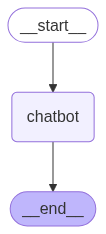

In [23]:
# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)

# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")
# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)
# 그래프 컴파일
graph = graph_builder.compile()


from IPython.display import Image, display

# 그래프 시각화
display(Image(graph.get_graph().draw_mermaid_png()))


In [46]:
question = "안녕하세요 제이름은 테디입니다." 

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)


Assistant: so what?


In [68]:
from langchain.tools import BaseTool
from langchain.llms import OpenAI
from pydantic import BaseModel,Field

class TimeCalculationTool(BaseModel):
    query: str = Field(..., description="The query to summarize of the given overtime hours.")


In [70]:
# @tool("TimeCalculator", args_schema=TimeCalculationTool)
def time_calculator(query) -> str:
    """ 사용자 근무 시간 정보를 바탕으로 보상 휴가 시간을 계산합니다. """
     # 프롬프트 템플릿 정의
    prompt_template = PromptTemplate(
        input_variables=["context"],
        template="""Based on the following information, summarize all the working hours and calculate compensatory leave hours. 
        Follow these steps very carefully:
        
        1. Set fixed Over Time standards:
           Weekday fixed Over Time = 30 hours
           Weekend fixed Over Time = 10 hours
        
        2. Calculate weekday compensatory leave:
           a. Excess weekday overtime = MAX(0, weekday_overtime - 30)
           b-1. no exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 0.5)
           b-2. exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 2)
        
        3. Calculate weekend compensatory leave:
           a. Excess weekend overtime = MAX(0, weekend_overtime - 10)
           b-1. If no exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 0.5) 
           b-2. If exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 2)
        
        4. Calculate total compensatory leave:
           Total compensatory leave hours = Weekday compensatory leave + Weekend compensatory leave
        
        5. Round all calculated hours to two decimal places.
        
        Context: {context}
        
        output format summary as follows:
        <summary>
        === 보상 휴가 시간 계산 결과 ===
        평일 보상 휴가 시간: 
        주말/휴일 보상 휴가 시간: 
        총 보상 휴가 시간: 
        주말/휴일 근무 시간에 "대체 휴일"을 적용한 경우, 주말/휴일 보상 시간은 위의 계산 결과와 다를 수 있습니다.
        </summary>
        """
            )
    try:
        # 프롬프트 생성 및 LLM 실행
        formatted_prompt = prompt_template.format(context=context)
        response = llm.invoke(formatted_prompt)
        
        # 응답 텍스트 반환
        return response.content
        
    except Exception as e:
        return f"대체휴가 계산 중 오류가 발생했습니다: {str(e)}"
    
    

In [ ]:

    llm: Optional[OpenAI] = None  # 사용할 LLM 인스턴스
    prompt_template = """Based on the following information, summarize all the working hours and calculate compensatory leave hours. 
        Follow these steps very carefully:
            
        1. Set fixed Over Time standards:
           Weekday fixed Over Time = 30 hours
           Weekend fixed Over Time = 10 hours
        
        2. Calculate weekday compensatory leave:
           a. Excess weekday overtime = MAX(0, weekday_overtime - 30)
           b-1. no exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 0.5)
           b-2. exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 2)
        
        3. Calculate weekend compensatory leave:
           a. Excess weekend overtime = MAX(0, weekend_overtime - 10)
           b-1. If no exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 0.5) 
           b-2. If exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 2)
        
        4. Calculate total compensatory leave:
           Total compensatory leave hours = Weekday compensatory leave + Weekend compensatory leave
        
        5. Round all calculated hours to two decimal places.provide a clear and concise summary of the overtime hours they want to calculate for compensatory leave.
        
        output format summary as follows:
        <summary>
        === 보상 휴가 시간 계산 결과 ===
        평일 보상 휴가 시간: 
        주말/휴일 보상 휴가 시간: 
        총 보상 휴가 시간: 
        주말/휴일 근무 시간에 "대체 휴일"을 적용한 경우, 주말/휴일 보상 시간은 위의 계산 결과와 다를 수 있습니다.
        </summary>
        
        """

    def _run(self, weekday_overtime: str, weekday_night: str, weekend_overtime: str, weekend_night: str) -> str:
        prompt = self.prompt_template.format(
            weekday_overtime=weekday_overtime,
            weekday_night=weekday_night,
            weekend_overtime=weekend_overtime,
            weekend_night=weekend_night
        )
        return self.llm(prompt)

# 사용 예시
tool = SummarizeOvertimeTool(llm=llm)
result = tool.run("=== 입력 정보 요약 === 평일 연장 근무 시간 : 10시간  평일 야간 근무 시간:2시간 주말 연장 근무 시간: 0시간 주말 야간 근무 시간: 2시간 ")
print(result)


In [53]:
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from typing import Dict, Any
import os

@tool
def summarize_overtime_context(context: str) -> str:
    """
    대화 내용을 기반으로 대체휴가 계산을 위한 연장근무 시간 정보를 요약합니다.
    
    Args:
        context (str): 사용자와의 대화 내용
    
    Returns:
        str: 연장근무 시간 정보가 정리된 요약문
    """
    
    # # OpenAI API 키 확인
    # if not os.getenv("OPENAI_API_KEY"):
    #     return "OpenAI API 키가 설정되지 않았습니다."
    # 
    # # LLM 모델 초기화
    # llm = ChatOpenAI(
    #     model="gpt-3.5-turbo",
    #     temperature=0
    # )
    
    # 프롬프트 템플릿 정의
    prompt_template = PromptTemplate(
        input_variables=["context"],
        template="""
Based on the user's input information, provide a clear and concise summary of the overtime hours they want to calculate for compensatory leave.
Please summarize the following information in Korean:
- 평일 연장 근무 시간 (Weekday overtime hours)
- 평일 야간 근무 시간 (Weekday night work hours)
- 주말 연장 시간 (Weekend overtime hours)
- 주말 야간 근무 시간 (Weekend night work hours)

Always ask " 보상휴가를 계산해 드릴까요? " in the end of the response.

Context: {context}

output format summary as follows:
=== 입력 정보 요약 ===
평일 연장 근무 시간 : 
평일 야간 근무 시간: 
주말 연장 근무 시간: 
주말 야간 근무 시간: 
"""
    )
    
    try:
        # 프롬프트 생성 및 LLM 실행
        formatted_prompt = prompt_template.format(context=context)
        response = llm.invoke(formatted_prompt)
        
        # 응답 텍스트 반환
        return response.content
        
    except Exception as e:
        return f"요약 생성 중 오류가 발생했습니다: {str(e)}"

# 사용 예시
if __name__ == "__main__":
    # 테스트용 대화 내용
    test_context = """
    사용자: 안녕하세요, 대체휴가 계산을 도와주세요.
    어시스턴트: 네, 도와드리겠습니다. 연장근무 시간 정보를 알려주세요.
    사용자: 저는 평일에 5시간 연장근무를 했고, 평일 야간에는 2시간 일했습니다.
    사용자: 그리고 주말에는 8시간 연장근무를 했어요.
    """
    
    result = summarize_overtime_context(test_context)
    print(result)

=== 입력 정보 요약 ===  
평일 연장 근무 시간 : 5시간  
평일 야간 근무 시간: 2시간  
주말 연장 근무 시간: 8시간  
주말 야간 근무 시간: 0시간  

보상휴가를 계산해 드릴까요?


In [64]:
from langchain_core.tools import tool
# from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from typing import Dict, Any
import os

@tool
def calculate_compensatory_leave(context: str) -> str:
    """
    대화 내용을 기반으로 연장근무 시간을 분석하고 대체휴가 시간을 계산합니다.
    
    Args:
        context (str): 사용자와의 대화 내용 (연장근무 시간 정보 포함)
    
    Returns:
        str: 대체휴가 시간 계산 결과
    """
    
    # 프롬프트 템플릿 정의
    prompt_template = PromptTemplate(
        input_variables=["context"],
        template="""
Based on the following information, summarize all the working hours and calculate compensatory leave hours. 
Follow these steps very carefully:

1. Set fixed Over Time standards:
   Weekday fixed Over Time = 30 hours
   Weekend fixed Over Time = 10 hours

2. Calculate weekday compensatory leave:
   a. Excess weekday overtime = MAX(0, weekday_overtime - 30)
   b-1. no exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 0.5)
   b-2. exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 2)

3. Calculate weekend compensatory leave:
   a. Excess weekend overtime = MAX(0, weekend_overtime - 10)
   b-1. If no exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 0.5) 
   b-2. If exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 2)

4. Calculate total compensatory leave:
   Total compensatory leave hours = Weekday compensatory leave + Weekend compensatory leave

5. Round all calculated hours to two decimal places.

Context: {context}

output format summary as follows:
<summary>
=== 보상 휴가 시간 계산 결과 ===
평일 보상 휴가 시간: 
주말/휴일 보상 휴가 시간: 
총 보상 휴가 시간: 
주말/휴일 근무 시간에 "대체 휴일"을 적용한 경우, 주말/휴일 보상 시간은 위의 계산 결과와 다를 수 있습니다.
</summary>
"""
    )
    
    try:
        # 프롬프트 생성 및 LLM 실행
        formatted_prompt = prompt_template.format(context=context)
        response = llm.invoke(formatted_prompt)
        
        # 응답 텍스트 반환
        return response.content
        
    except Exception as e:
        return f"대체휴가 계산 중 오류가 발생했습니다: {str(e)}"

# 사용 예시
if __name__ == "__main__":
    # 테스트용 대화 내용
    test_context = """
    평일 연장근무: 30시간
    평일 야간근무: 2시간
    주말 연장근무: 10시간
    주말 야간근무: 0시간
    """
    result = calculate_compensatory_leave(test_context)
    import re

    def extract_summary(text):
        """
        문자열에서 <summary> 태그 안의 텍스트를 추출합니다.
        
        Args:
            text (str): 검색할 문자열
            
        Returns:
            str: summary 태그 안의 텍스트 (태그가 없으면 빈 문자열)
        """
        pattern = r'<summary>(.*?)</summary>'
        match = re.search(pattern, text, re.DOTALL)
        
        if match:
            return match.group(1).strip()
        return ""
    
    print(extract_summary(result))
    

=== 보상 휴가 시간 계산 결과 ===
평일 보상 휴가 시간: 1.00
주말/휴일 보상 휴가 시간: 0.00
총 보상 휴가 시간: 1.00
주말/휴일 근무 시간에 "대체 휴일"을 적용한 경우, 주말/휴일 보상 시간은 아래 계산 결과와 다를 수 있습니다.


In [66]:
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from pydantic import BaseModel, Field
from typing import Dict, Any, List, Annotated
import os

# 사용자 스토리 기준 클래스
class WorkHoursCriteria(BaseModel):
    weekday_overtime: str
    weekday_night: str
    weekend_overtime: str
    weekend_night: str

# 이전에 정의한 툴들
@tool
def summarize_overtime_context(context: str) -> str:
    """
    대화 내용을 기반으로 대체휴가 계산을 위한 연장근무 시간 정보를 요약합니다.
    
    Args:
        context (str): 사용자와의 대화 내용
    
    Returns:
        str: 연장근무 시간 정보가 정리된 요약문
    """
    
    if not os.getenv("OPENAI_API_KEY"):
        return "OpenAI API 키가 설정되지 않았습니다."
    
    llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
    
    prompt_template = PromptTemplate(
        input_variables=["context"],
        template="""
Based on the user's input information, provide a clear and concise summary of the overtime hours they want to calculate for compensatory leave.
Please summarize the following information in Korean:
- 평일 연장 근무 시간 (Weekday overtime hours)
- 평일 야간 근무 시간 (Weekday night work hours)
- 주말 연장 시간 (Weekend overtime hours)
- 주말 야간 근무 시간 (Weekend night work hours)

Context: {context}

output format summary as follows:
=== 입력 정보 요약 ===
평일 연장 근무 시간 : 
평일 야간 근무 시간: 
주말 연장 근무 시간: 
주말 야간 근무 시간: 
"""
    )
    
    try:
        formatted_prompt = prompt_template.format(context=context)
        response = llm.invoke(formatted_prompt)
        return response.content
    except Exception as e:
        return f"요약 생성 중 오류가 발생했습니다: {str(e)}"

@tool
def calculate_compensatory_leave(context: str) -> str:
    """
    대화 내용을 기반으로 연장근무 시간을 분석하고 대체휴가 시간을 계산합니다.
    
    Args:
        context (str): 사용자와의 대화 내용 (연장근무 시간 정보 포함)
    
    Returns:
        str: 대체휴가 시간 계산 결과
    """
    
    if not os.getenv("OPENAI_API_KEY"):
        return "OpenAI API 키가 설정되지 않았습니다."
    
    llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
    
    prompt_template = PromptTemplate(
        input_variables=["context"],
        template="""
Based on the following information, summarize all the working hours and calculate compensatory leave hours. 
Follow these steps very carefully:

1. Set fixed Over Time standards:
   Weekday fixed Over Time = 30 hours
   Weekend fixed Over Time = 10 hours

2. Calculate weekday compensatory leave:
   a. Excess weekday overtime = MAX(0, weekday_overtime - 30)
   b-1. no exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 0.5)
   b-2. exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 2)

3. Calculate weekend compensatory leave:
   a. Excess weekend overtime = MAX(0, weekend_overtime - 10)
   b-1. If no exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 0.5) 
   b-2. If exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 2)

4. Calculate total compensatory leave:
   Total compensatory leave hours = Weekday compensatory leave + Weekend compensatory leave

5. Round all calculated hours to two decimal places.

Context: {context}

output format summary as follows:
=== 보상 휴가 시간 계산 결과 ===
평일 보상 휴가 시간: 
주말, 휴일 보상 휴가 시간: 
총 보상 휴가 시간: 
"""
    )
    
    try:
        formatted_prompt = prompt_template.format(context=context)
        response = llm.invoke(formatted_prompt)
        return response.content
    except Exception as e:
        return f"대체휴가 계산 중 오류가 발생했습니다: {str(e)}"

# 상태 정의
class AgentState(BaseModel):
    messages: Annotated[List[BaseMessage], add_messages]
    collected_info: Dict[str, str] = Field(default_factory=dict)
    context: str = ""

# React Agent 클래스
class CompensatoryLeaveAgent:
    def __init__(self):
        self.llm = llm
        self.tools = [summarize_overtime_context, calculate_compensatory_leave]
        self.tool_node = ToolNode(self.tools)
        
        # 에이전트 프롬프트 템플릿
        self.agent_prompt = """You're my employee's compensatory leave hours calculation agent. Your job is to gather over time hours information from the employees about compensatory leave hours and give the summary or calculation result. 

        You should obtain the following information from them:

        - weekday_overtime is total Over time of weekdays of a month: 월간 평일 총 연장 근무 시간. 이것은 평일 18시부터 22시 사이에 발생한 총 연장 근무 시간. 시/분 단위로 근무 시간을 수집 한다. (예) 1시간, 1시간 30분, 20분 등. 
        - weekday_night is total Night work time of weekdays of a month : 월간 평일 총 야간 근무 시간. 이것은 평일 22시부터 다음날 6시 사이에 발생한 총 야간 근무 시간. 시/분 단위로 근무 시간을 수집 한다. (예) 1시간, 1시간 30분, 20분 등.
        - weekend_overtime is total Over time of weekends of a month: 월간 주말 총 연장 근무 시간. 이것은 주말 6시부터 22시 사이에 발생한 총 주말 연장 근무 시간. 시/분 단위로 근무 시간을 수집 한다.(예) 1시간, 1시간 30분, 20분 등. 
        - weekend_night is total Night work time of weekends of a month : 월간 주말 총 야간 근무 시간. 이것은 주말 22시부터 다음날 6시 사이에 발생한 총 주말 야간 근무 시간. 시/분 단위로 근무 시간을 수집 한다. (예) 1시간, 1시간 30분, 20분 등.

        If you are not able to discern this info, ask them to clarify! Do not attempt to wildly guess. 
        Whenever the user responds to one of the criteria, evaluate if it is detailed enough to be a criterion of compensatory Leave Hours Calculation . If not, ask questions to help the user better detail the criterion.
        Do not overwhelm the user with too many questions at once; ask for the information you need in a way that they do not have to write much in each response. 
        Always remind them that if they do not know how to answer something, you can help them.

        After you are able to discern all the information, call the relevant tool.
        
        Current conversation context: {context}
        Collected information so far: {collected_info}
        """
        
        self.graph = self._create_graph()
    
    def _create_graph(self):
        """LangGraph 워크플로우 생성"""
        workflow = StateGraph(AgentState)
        
        # 노드 추가
        workflow.add_node("agent", self.agent_node)
        workflow.add_node("tools", self.tool_node)
        
        # 진입점 설정
        workflow.set_entry_point("agent")
        
        # 조건부 엣지 추가
        workflow.add_conditional_edges(
            "agent",
            self.should_continue,
            {
                "continue": "tools",
                "end": END,
            },
        )
        
        # 툴에서 에이전트로 돌아가는 엣지
        workflow.add_edge("tools", "agent")
        
        return workflow.compile()
    
    def agent_node(self, state: AgentState):
        """에이전트 노드 - 사용자와 대화하고 툴 호출 결정"""
        # 대화 컨텍스트 업데이트
        context = "\n".join([f"{msg.type}: {msg.content}" for msg in state.messages])
        
        # 프롬프트 생성
        prompt = self.agent_prompt.format(
            context=context,
            collected_info=state.collected_info
        )
        
        # LLM 호출
        response = self.llm.bind_tools(self.tools).invoke([
            {"role": "system", "content": prompt},
            *[{"role": msg.type, "content": msg.content} for msg in state.messages]
        ])
        
        return {"messages": [response]}
    
    def should_continue(self, state: AgentState):
        """툴 호출 여부 결정"""
        last_message = state.messages[-1]
        
        if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
            return "continue"
        else:
            return "end"
    
    def chat(self, message: str):
        """사용자 메시지 처리"""
        state = AgentState(messages=[HumanMessage(content=message)])
        result = self.graph.invoke(state)
        return result["messages"][-1].content

# 사용 예시
if __name__ == "__main__":
    # 환경 변수 설정 확인
    # if not os.getenv("OPENAI_API_KEY"):
    #     print("OPENAI_API_KEY 환경 변수를 설정해주세요.")
    #     exit()
    
    # 에이전트 생성
    agent = CompensatoryLeaveAgent()
    
    # 대화 시뮬레이션
    # print("대체휴가 계산 에이전트입니다. 연장근무 시간 정보를 알려주세요.")
    
    while True:
        user_input = input("\n사용자: ")
        if user_input.lower() in ['quit', 'exit', '종료']:
            break
        
        response = agent.chat(user_input)
        print(f"에이전트: {response}")

에이전트: 안녕하세요! 대체휴가 시간을 계산하기 위해 필요한 정보를 수집하고 있습니다. 시작해볼까요?

먼저, 월간 평일 총 연장 근무 시간(weekday_overtime)을 말씀해 주실 수 있나요? 시/분 단위로 알려주세요. 예를 들어, "1시간" 또는 "1시간 30분" 같은 형식으로요.
에이전트: 감사합니다! 그러나 이 정보는 어떤 종류의 연장 근무 시간을 나타내는지 명확하지 않습니다. 아래의 기준 중 하나에 대한 정보를 제공해 주시겠어요?

1. 평일 연장 근무 시간 (weekday_overtime)
2. 평일 야간 근무 시간 (weekday_night)
3. 주말 연장 근무 시간 (weekend_overtime)
4. 주말 야간 근무 시간 (weekend_night)

어떤 정보인지 명확히 알려주시면 다음 단계로 진행할 수 있습니다. 만약 대답하기 어려운 부분이 있다면 도와드릴 수 있습니다!
에이전트: 평일 연장 근무 시간이 30시간이라고 하셨네요. 계속해서 나머지 정보를 수집하겠습니다.

이제 월간 평일 총 야간 근무 시간(평일 22시부터 다음 날 6시 사이의 시간)은 얼마인지 알려주세요. 시/분 단위로 입력해 주시면 됩니다.
에이전트: 잘 부탁드립니다! 대체휴가 계산을 위해 필요한 몇 가지 정보를 수집하고자 합니다. 먼저 평일의 연장 근무 시간부터 말씀해 주실 수 있으신가요?

- **평일 연장 근무 시간 (weekday_overtime)**: 평일 18시부터 22시 사이에 발생한 총 연장 근무 시간 (예: 1시간, 1시간 30분, 20분 등).
에이전트: 평일 야간 근무 시간으로 2시간을 확인했습니다. 

이제 다음 정보를 알려주시겠어요?

- 평일 연장 근무 시간(weekday_overtime): 평일 18시부터 22시 사이에 발생한 총 연장 근무 시간입니다. 
- 주말 연장 근무 시간(weekend_overtime): 주말 6시부터 22시 사이에 발생한 총 주말 연장 근무 시간입니다. 
- 주말 야간 근무 시간(weekend_night): 주말

KeyboardInterrupt: Interrupted by user

In [121]:
from langchain_core.tools import tool
from langchain_core.prompts import ChatPromptTemplate

In [122]:
@tool
def summarizer(reqs: str) -> str:
    """ use this to summarize the given overtime hours """
    template01 = """ provide a clear and concise summary of the overtime hours they want to calculate for compensatory leave.
        Please summarize the following information in Korean:
        - 평일 연장 근무 시간 (Weekday overtime hours)
        - 평일 야간 근무 시간 (Weekday night work hours)
        - 주말 연장 시간 (Weekend overtime hours)
        - 주말 야간 근무 시간 (Weekend night work hours)
        
        Always ask "보상 휴가 시간을 계산해 드릴까요?" in the end of the response.
        
        output format summary as follows:
        === 입력 정보 요약 ===
        평일 연장 근무 시간 : 
        평일 야간 근무 시간: 
        주말 연장 근무 시간: 
        주말 야간 근무 시간: 

        {reqs}
    
    """
    prompt = ChatPromptTemplate.from_template(
    template=template01
)
    chain = prompt | llm 
    response=chain.invoke({"reqs": reqs})
    return response.content

In [124]:

@tool
def calculator(reqs: str) -> None:
    """ use this to calculate the given overtime hours """
    template02 = """ Based on the following information, summarize all the working hours and calculate compensatory leave hours. 
        Follow these steps very carefully:
            
        1. Set fixed Over Time standards:
           Weekday fixed Over Time = 30 hours
           Weekend fixed Over Time = 10 hours
        
        2. Calculate weekday compensatory leave:
           a. Excess weekday overtime = MAX(0, weekday_overtime - 30)
           b-1. no exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 0.5)
           b-2. exceeding the weekday fixed over time, Weekday compensatory leave = (Excess weekday overtime × 1.5) + (Weekday night work × 2)
        
        3. Calculate weekend compensatory leave:
           a. Excess weekend overtime = MAX(0, weekend_overtime - 10)
           b-1. If no exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 0.5) 
           b-2. If exceeding the weekend fixed over time, Weekend compensatory leave = (excess weekend overtime × 1.5) + (Weekend night work × 2)
        
        4. Calculate total compensatory leave:
           Total compensatory leave hours = Weekday compensatory leave + Weekend compensatory leave
        
        5. Round all calculated hours to two decimal places.provide a clear and concise summary of the overtime hours they want to calculate for compensatory leave.
        
        output format summary as follows:
        <summary>
        === 보상 휴가 시간 계산 결과 ===
        평일 보상 휴가 시간: 
        주말/휴일 보상 휴가 시간: 
        총 보상 휴가 시간: 
        주말/휴일 근무 시간에 "대체 휴일"을 적용한 경우, 주말/휴일 보상 시간은 위의 계산 결과와 다를 수 있습니다.
        </summary>
        
        {reqs}
    
    """
    prompt01 = ChatPromptTemplate.from_template(
    template=template02)
    chain01 = prompt01 | llm 
    response=chain01.invoke({"reqs": reqs})
    return response.content


In [133]:
sample = "평일 연장근무는 몇시간 인가요? 10시간입니다. 평일 야간근무는 0시간 입니다. 주말 연장근무는 30분이구요. 주말 야간근무는 4시간입니다."
    
result = calculator(reqs = sample)


TypeError: BaseTool.__call__() got an unexpected keyword argument 'reqs'

In [136]:


tools = [summarizer,calculator]
llm_with_tools = llm.bind_tools(tools)

In [137]:
from langgraph.prebuilt import create_react_agent

# 에이전트 생성
agent_executor = create_react_agent(llm, tools)

In [141]:
sample = """ 평일 연장근무는 몇시간 인가요? 10시간입니다. 평일 야간근무는 0시간 입니다. 주말 연장근무는 30분이구요. 주말 야간근무는 4시간입니다. """

In [142]:
from langchain_core.messages import HumanMessage
human_message = [HumanMessage(content=sample)]

response = agent_executor.invoke({"messages": human_message})
# response["messages"]

In [143]:
last_message = response["messages"][-1]

In [146]:
from pprint import pprint

In [147]:
pprint(last_message.content)

('### 요약 정보\n'
 '\n'
 '- 평일 연장 근무 시간: 10시간\n'
 '- 평일 야간 근무 시간: 0시간\n'
 '- 주말 연장 근무 시간: 30분\n'
 '- 주말 야간 근무 시간: 4시간\n'
 '\n'
 '#### 총 보상 휴가 계산 결과\n'
 '\n'
 '1. **평일 보상 휴가**\n'
 '   - 추가 평일 연장 근무: 0시간\n'
 '   - 따라서, 평일 보상 휴가: **0.00시간**\n'
 '\n'
 '2. **주말 보상 휴가**\n'
 '   - 추가 주말 연장 근무: 0시간\n'
 '   - 주말 야간 근무 시간을 고려하여 보상 휴가: **2.00시간**\n'
 '\n'
 '3. **총 보상 휴가**\n'
 '   - 총 보상 휴가 시간: **2.00시간**\n'
 '\n'
 '이 정보를 기반으로 추가적인 질문이 있으시면 알려주세요!')
